# Logistic Regression
Work through the steps of binary classification on the breast cancer dataset using logistic regression.

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data/breast_cancer.csv")

## 2. Understanding Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               306 non-null    int64
 1   Year              306 non-null    int64
 2   Nodes             306 non-null    int64
 3   Survived_5_Years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


,Age,Year,Nodes,Survived_5_Years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 3. Feature Selection

### 3.1. Correlation

<Axes: >

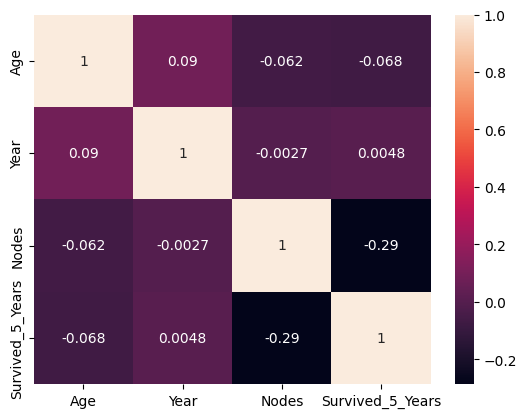

In [4]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

I am going to pick node to see how it correlate withs breast cancer survival after 5 years. I think that the more nodes will mean less survival so thats why it has a negative value

## 4. Building our Model

In [5]:
# Extract Data
X = df[["Nodes"]]
y = df["Survived_5_Years"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LogisticRegression()

# Train the model 
model = model.fit(X_train, y_train)

## 5. Evaluating our Model

In [6]:
# Make prediction onf the test data
y_pred = model.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual')

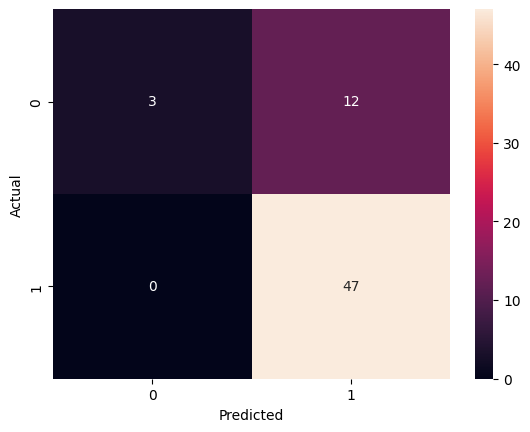

In [7]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [8]:
model.score(X_test, y_test)

0.8064516129032258

## 6. Building and Evaluating Another Model

In [9]:
# Extract Data
X = df[["Nodes", "Age"]]
y = df["Survived_5_Years"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LogisticRegression()

# Train the model 
model = model.fit(X_train, y_train)

Text(50.722222222222214, 0.5, 'Actual')

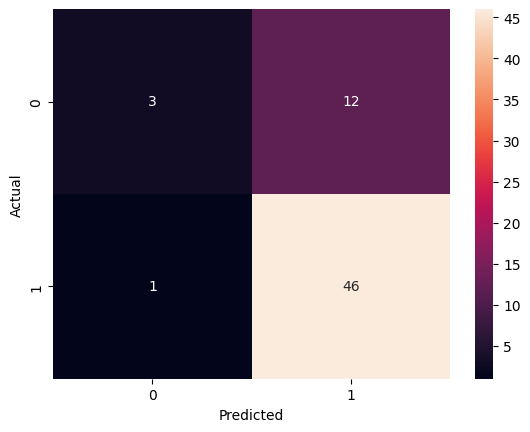

In [10]:
# Make prediction onf the test data
y_pred = model.predict(X_test)
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [11]:
model.score(X_test, y_test)

0.7903225806451613

## 7. Explain why the accuracy of our model changed.

The accuracy of our model changes because when we added a second feature we are now comparing the model results while considering two sets of data versus 1 set of data originally. There is now only 1 set of data excluded from the model compared to two sets of data excluded originally. 